## **CREDIT CARD FRAUD DETECTION**
1. Analyze dataset
2. Balancing dataset
3. Deep learning model
4. Compare the results

Dataset link: https://www.kaggle.com/mlg-ulb/creditcardfraud



# Importing

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
%matplotlib inline
import datetime 
import time 
import tensorflow as tf

# Reading Dataset

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Read Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Analyze data

In [4]:
# Data dimension
print("Data dimension     :",df.shape)
print("Data size          :",df.size)
print("Number of Row      :",len(df.index))
print("Number of Columns  :",len(df.columns))

Data dimension     : (284807, 31)
Data size          : 8829017
Number of Row      : 284807
Number of Columns  : 31


In [5]:
# Basic description - statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Comment**: So there is no null data in dataset

In [7]:
# The ratio of normal and fraudulent transactions

counts = df.Class.value_counts()
normal = counts[0]
fraud = counts[1]
perc_normal = (normal / (normal + fraud)) * 100
perc_fraud = (fraud / (normal + fraud)) * 100
print('Normal operations {0},{1:6.3}% of the total'.format(normal, perc_normal))
print('Fraud transactions {0},{1:6.3}% of the total'.format(fraud, perc_fraud))

Normal operations 284315,  99.8% of the total
Fraud transactions 492, 0.173% of the total


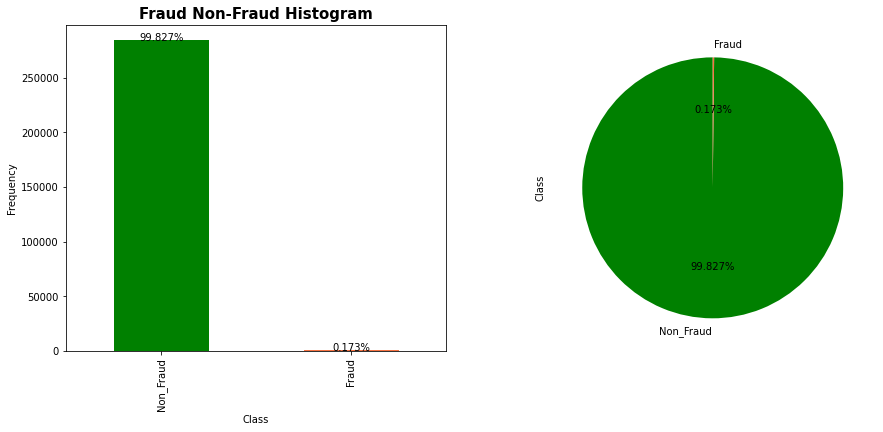

In [8]:
# Create a bar plot for the number and percentage of fraud vs non-fraud transcations
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title('Fraud Non-Fraud Histogram', fontweight='bold', fontsize=15)
count_of_classes = pd.value_counts(df['Class'], sort = True).sort_index()
ax = count_of_classes.plot(kind = 'bar', color=['g', '#f57242'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0,1],["Non_Fraud","Fraud"])

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(height*100/total),
            ha="center") 


plt.subplot(122)
labels = 'Non_Fraud', 'Fraud'
df["Class"].value_counts().plot.pie(autopct = "%1.3f%%", labels=labels, startangle=90, colors=['g', '#f57242'])
plt.show()


**Comment** : As you can observe data is imbalanced.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


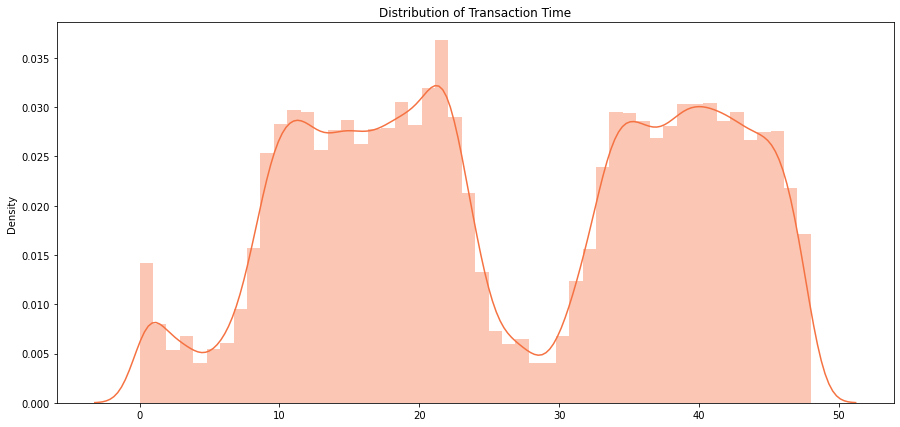

In [9]:
# Time Distribution plot for transactions 
plt.figure(figsize=(15,7))

plt.title('Distribution of Transaction Time')
sns.distplot(df['Time'].values/(60*60), color='#f57242')

**Comment** : Larger number of Transactions happened between 10 and 20 hr, after that it decreases to go lowest at 30 and increases again.


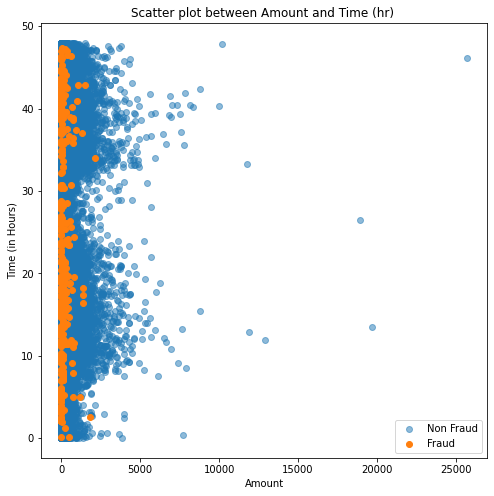

In [10]:
non_fraud = df[df.Class==0]
fraud = df[df.Class==1]

# Scatter plot between Amount and Time
fig = plt.figure(figsize = (8,8))
plt.scatter(non_fraud.Amount, non_fraud.Time.values/(60*60), alpha=0.5, label='Non Fraud')
plt.scatter(fraud.Amount, fraud.Time.values/(60*60), alpha=1, label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Time (in Hours)')
plt.title('Scatter plot between Amount and Time (hr) ')
plt.legend()
plt.show()

**Comment**: We can see maximum fraud transactions are of less amount

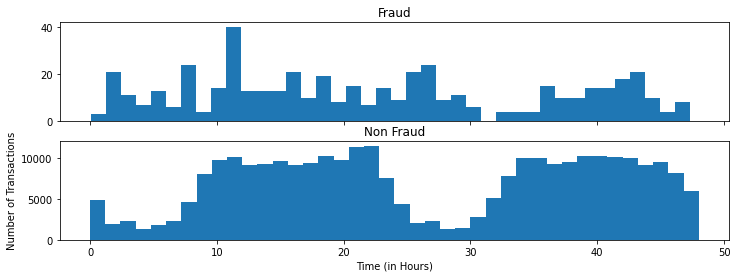

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(df.Time[df.Class == 1]/(60*60), bins=40)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0]/(60*60), bins=40)
ax2.set_title('Non Fraud')

plt.xlabel('Time (in Hours)')
plt.ylabel('Number of Transactions')
plt.show()

**Comment** : Maximum fraud transactions have taken place in between time of 10 hours and 22 hours

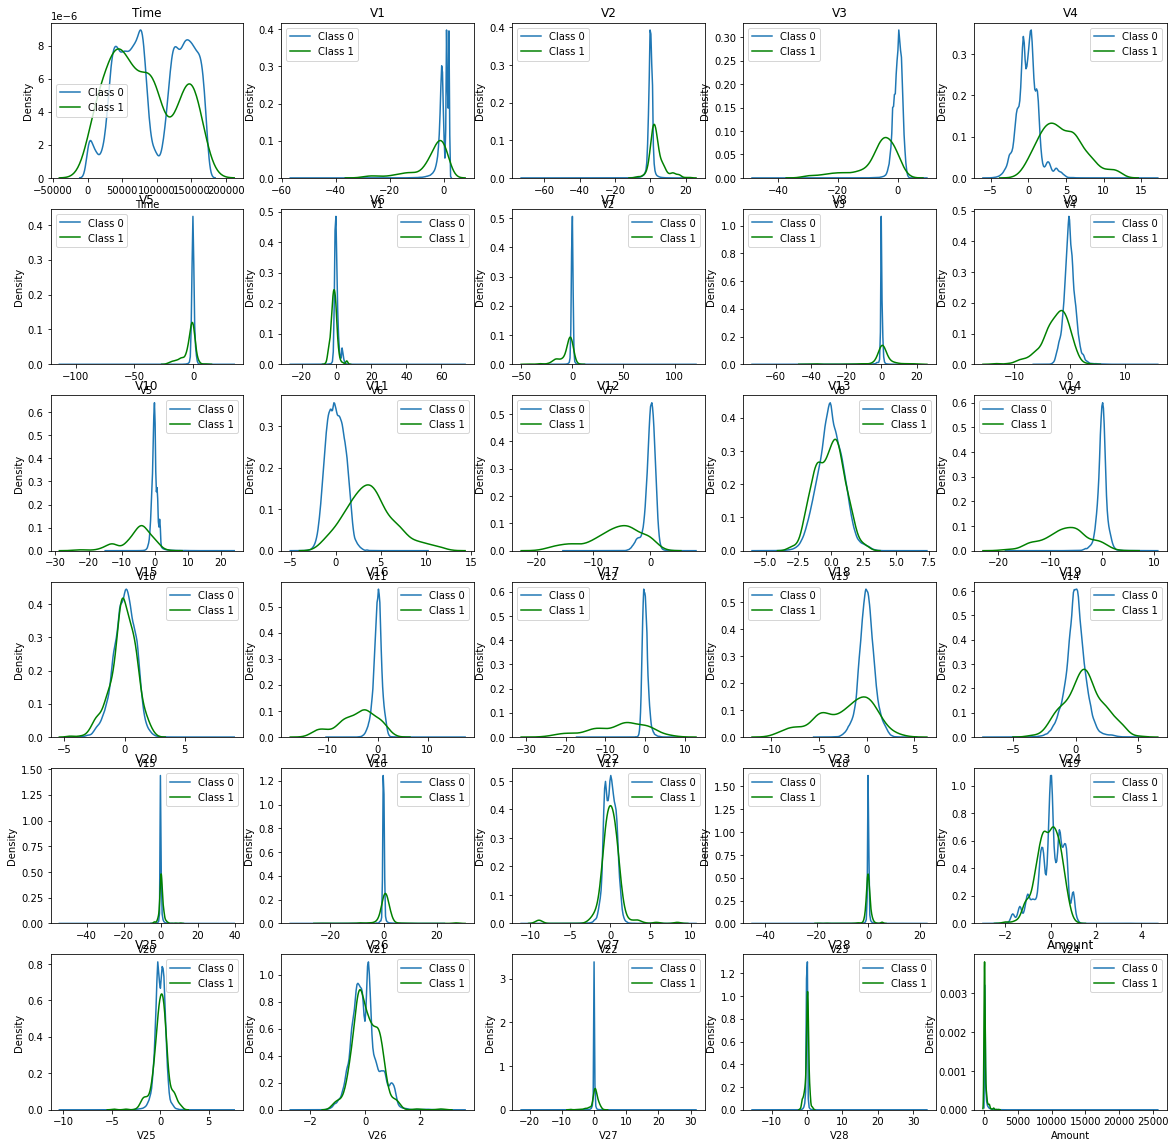

In [12]:
# plotting the distribution for all the  variables
df_col = df.columns.tolist() # get the list of variables
df_col.pop() # remove the class variable

fig, ax = plt.subplots(6,5,figsize=(20,20))
i=1
for col in df_col:
 plt.subplot(6,5,i) 
 sns.kdeplot(df.loc[df['Class']==0][col])
 sns.kdeplot(df.loc[df['Class']==1][col],color='g')
 plt.legend(['Class 0', 'Class 1' ])
 plt.title(col)
 i+=1

**Comment** : Almost all the variables are skewed and hence they have to be corrected before model building


# Balancing Dataset

We've already seen that the dataset is highly imbalanced. So we need to balance the dataset. We'll apply oversampling to balance the dataset.

In [13]:
df_fraud = df[df.Class==1]
df_non_fraud = df[df.Class==0]

# Oversample the minority class
from sklearn.utils import resample
df_fraud_oversampled = resample(df_fraud, replace=True, n_samples=len(df_non_fraud), random_state=42)

# Combine majority with minority class
df_oversampled = pd.concat([df_fraud_oversampled, df_non_fraud])

In [14]:
df_oversampled.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [15]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Comment**: So there is no null in oversampled data

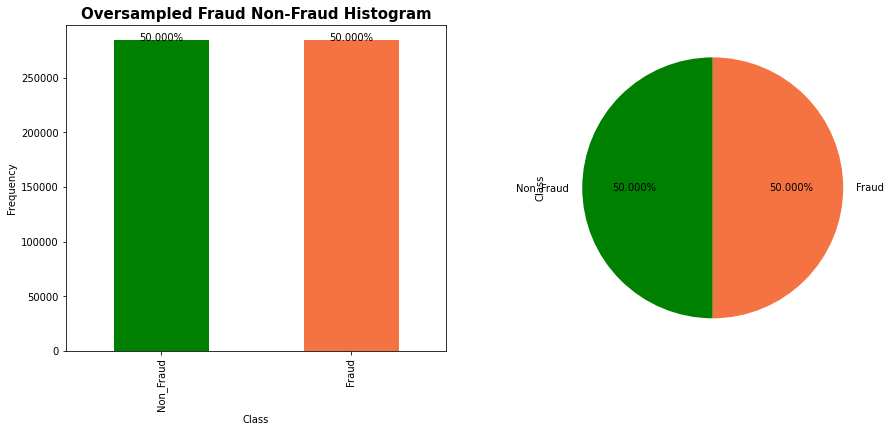

In [16]:
# Create a bar plot for the number and percentage of fraud vs non-fraud transcations
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title('Oversampled Fraud Non-Fraud Histogram', fontweight='bold', fontsize=15)
count_of_classes = pd.value_counts(df_oversampled['Class'], sort = True).sort_index()
ax = count_of_classes.plot(kind = 'bar', color=['g', '#f57242'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0,1],["Non_Fraud","Fraud"])

total = float(len(df_oversampled))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(height*100/total),
            ha="center") 


plt.subplot(122)
labels = 'Non_Fraud', 'Fraud'
df_oversampled["Class"].value_counts().plot.pie(autopct = "%1.3f%%", labels=labels, startangle=90, colors=['g', '#f57242'])
plt.show()

**Comment** : Now the dataset is balanced

# Dividing to Target y and Features X

In [17]:
# Target y and features X for developing NN models
y = df_oversampled.Class
X = df_oversampled.drop(['Class'], axis=1)

# Train Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)
print(X_train.shape)
print(X_test.shape)

(398041, 30)
(170589, 30)


In [ ]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398041 entries, 72757 to 63283
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    398041 non-null  float64
 1   V1      398041 non-null  float64
 2   V2      398041 non-null  float64
 3   V3      398041 non-null  float64
 4   V4      398041 non-null  float64
 5   V5      398041 non-null  float64
 6   V6      398041 non-null  float64
 7   V7      398041 non-null  float64
 8   V8      398041 non-null  float64
 9   V9      398041 non-null  float64
 10  V10     398041 non-null  float64
 11  V11     398041 non-null  float64
 12  V12     398041 non-null  float64
 13  V13     398041 non-null  float64
 14  V14     398041 non-null  float64
 15  V15     398041 non-null  float64
 16  V16     398041 non-null  float64
 17  V17     398041 non-null  float64
 18  V18     398041 non-null  float64
 19  V19     398041 non-null  float64
 20  V20     398041 non-null  float64
 21  V21    

In [ ]:
# First 5 entries
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
72757,54846.0,-2.986466,-0.000891,0.605887,0.338338,0.685448,-1.581954,0.504206,-0.233403,0.636768,...,-0.764274,-0.875146,-0.509849,1.313918,0.355065,0.448552,0.193490,1.214588,-0.013923,1.79
39183,39729.0,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,...,1.784449,0.447180,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,776.83
81495,58956.0,-0.412662,0.942097,1.533387,-0.018766,-0.201216,-0.930551,0.605219,0.017338,-0.172296,...,0.002014,-0.245405,-0.715905,-0.005605,0.320486,-0.243408,0.076443,0.255797,0.117754,2.58
221172,142462.0,1.920297,-1.116431,-2.355425,-0.940968,-0.088454,-1.207316,0.333084,-0.447857,-1.118649,...,0.252653,0.476830,0.946256,-0.253596,-0.342701,0.360390,0.070343,-0.116778,-0.067353,181.32
42945,41308.0,-13.680760,6.990389,-13.770001,8.694897,-11.426968,-2.919845,-14.594562,8.622905,-8.090697,...,-0.877392,2.989553,0.497599,-0.509290,0.732503,0.280528,0.280037,-1.406687,-0.663643,0.76


# Standardize 

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
X_train.shape, X_test.shape

((398041, 30, 1), (170589, 30, 1))

In [22]:
y_train = y_train.ravel()
y_test = y_test.ravel()
y_train

array([1, 1, 0, ..., 0, 1, 0])

# ANN Model (On oversampled data)

In [23]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=16, input_dim=30, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-trainabl

In [24]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
3981/3981 [==============================] - 11s 3ms/step - loss: 0.1074 - accuracy: 0.9631 - val_loss: 0.0451 - val_accuracy: 0.9826
Epoch 2/5
3981/3981 [==============================] - 10s 3ms/step - loss: 0.0374 - accuracy: 0.9869 - val_loss: 0.0190 - val_accuracy: 0.9956
Epoch 3/5
3981/3981 [==============================] - 10s 2ms/step - loss: 0.0257 - accuracy: 0.9921 - val_loss: 0.0195 - val_accuracy: 0.9934
Epoch 4/5
3981/3981 [==============================] - 9s 2ms/step - loss: 0.0210 - accuracy: 0.9939 - val_loss: 0.0117 - val_accuracy: 0.9974
Epoch 5/5
3981/3981 [==============================] - 9s 2ms/step - loss: 0.0192 - accuracy: 0.9945 - val_loss: 0.0118 - val_accuracy: 0.9967


In [25]:
# evaluation
score = ann.evaluate(X_test, y_test)
score

5331/5331 [==============================] - 7s 1ms/step - loss: 0.0118 - accuracy: 0.9967


[0.011786392889916897, 0.9966879487037659]

In [26]:
# prediction
y_pred = ann.predict(X_test)

[[84896   398]
 [  167 85128]]


[Text(51.0, 0.5, 'True Label'), Text(0.5, 24.0, 'Predicted Label')]

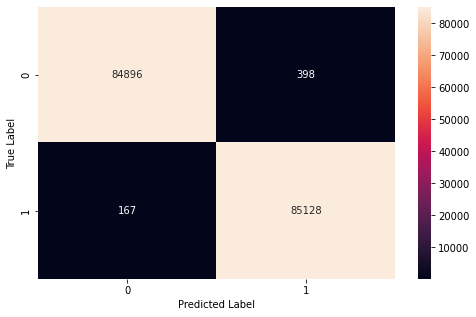

In [28]:
# confusion mat
confusion_mat = confusion_matrix(y_test, y_pred.round()) 
print(confusion_mat)

df_conf = pd.DataFrame(confusion_mat, index=(0, 1), columns = (0, 1))
plt.figure(figsize = (8, 5))
s = sns.heatmap(df_conf, annot=True, fmt='g')
s.set(xlabel='Predicted Label', ylabel='True Label')

In [29]:
# AUPRC
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
auprc = metrics.auc(recall, precision)
print(auprc)

#AUROC
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
auroc = metrics.auc(false_positive_rate, true_positive_rate)
print(auroc)

0.9996527117569487
0.9996949110365839


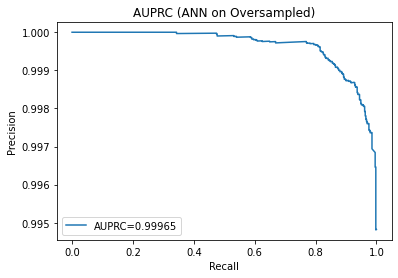

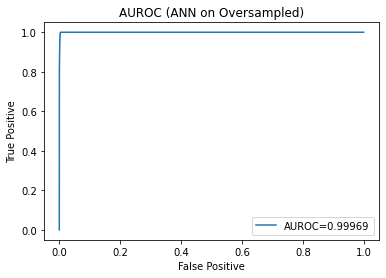

In [30]:
plt.plot(recall, precision, label="AUPRC={0:.5f}".format(auprc))
plt.title('AUPRC (ANN on Oversampled)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.plot(false_positive_rate, true_positive_rate, label="AUROC={0:.5f}".format(auroc))
plt.title('AUROC (ANN on Oversampled)')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()
plt.show()

# CNN Model (On oversampled data)


In [31]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 448)               0         
                                                                 
 dense_5 (Dense)             (None, 32)                14368     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,529
Trainable params: 14,529
Non-trainable params: 0
__________________________________________________

In [32]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Train the model
history = cnn.fit(X_train, y_train, epochs=5, batch_size=100)

Epoch 1/5
3981/3981 [==============================] - 15s 4ms/step - loss: 0.0856 - accuracy: 0.9682
Epoch 2/5
3981/3981 [==============================] - 15s 4ms/step - loss: 0.0301 - accuracy: 0.9924
Epoch 3/5
3981/3981 [==============================] - 15s 4ms/step - loss: 0.0190 - accuracy: 0.9957
Epoch 4/5
3981/3981 [==============================] - 15s 4ms/step - loss: 0.0148 - accuracy: 0.9967
Epoch 5/5
3981/3981 [==============================] - 16s 4ms/step - loss: 0.0118 - accuracy: 0.9973


In [34]:
# evaluation
score = cnn.evaluate(X_test, y_test)
score

5331/5331 [==============================] - 8s 1ms/step - loss: 0.0098 - accuracy: 0.9977


[0.009826714172959328, 0.9977079629898071]

In [35]:
# prediction
y_pred = cnn.predict(X_test)

[[84903   391]
 [    0 85295]]


[Text(51.0, 0.5, 'True Label'), Text(0.5, 24.0, 'Predicted Label')]

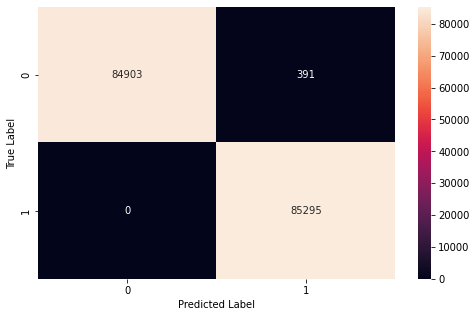

In [36]:
# confusion mat
confusion_mat = confusion_matrix(y_test, y_pred.round()) 
print(confusion_mat)

df_conf = pd.DataFrame(confusion_mat, index=(0, 1), columns = (0, 1))
plt.figure(figsize = (8, 5))
s = sns.heatmap(df_conf, annot=True, fmt='g')
s.set(xlabel='Predicted Label', ylabel='True Label')

In [37]:
# AUPRC
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
auprc_cnn = metrics.auc(recall, precision)
print(auprc_cnn)

#AUROC
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
auroc_cnn = metrics.auc(false_positive_rate, true_positive_rate)
print(auroc_cnn)

0.9997493690081526
0.9997953525843508


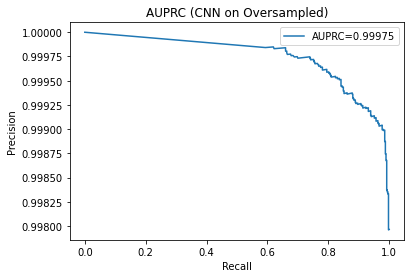

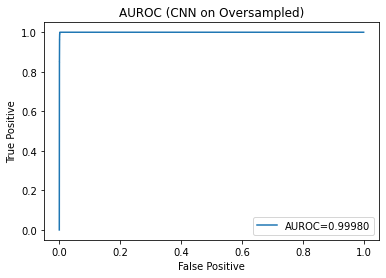

In [38]:
plt.plot(recall, precision, label="AUPRC={0:.5f}".format(auprc_cnn))
plt.title('AUPRC (CNN on Oversampled)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.plot(false_positive_rate, true_positive_rate, label="AUROC={0:.5f}".format(auroc_cnn))
plt.title('AUROC (CNN on Oversampled)')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()
plt.show()

# Work with unbalanced data

In [39]:
# Target y and features X for developing NN models
y = df.Class
X = df.drop(['Class'], axis=1)

In [40]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)
print(X_train.shape)
print(X_test.shape)

(199364, 30)
(85443, 30)


In [41]:
# Standarized
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [43]:
y_train = y_train.ravel()
y_test = y_test.ravel()
y_train

array([0, 0, 0, ..., 0, 0, 0])

**ANN**

In [44]:
ann_unbalanced = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=16, input_dim=30, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

ann_unbalanced.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                496       
                                                                 
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 8)                 264       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-traina

In [45]:
ann_unbalanced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann_unbalanced.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1994/1994 [==============================] - 6s 3ms/step - loss: 0.0141 - accuracy: 0.9986 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 2/5
1994/1994 [==============================] - 5s 2ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 3/5
1994/1994 [==============================] - 5s 3ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 4/5
1994/1994 [==============================] - 5s 2ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 5/5
1994/1994 [==============================] - 5s 3ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9994


In [46]:
# evaluation
score = ann_unbalanced.evaluate(X_test, y_test)
score

2671/2671 [==============================] - 4s 1ms/step - loss: 0.0028 - accuracy: 0.9994


[0.0027871872298419476, 0.999426543712616]

In [47]:
# prediction
y_pred = ann_unbalanced.predict(X_test)

[[85273    22]
 [   27   121]]


[Text(51.0, 0.5, 'True Label'), Text(0.5, 24.0, 'Predicted Label')]

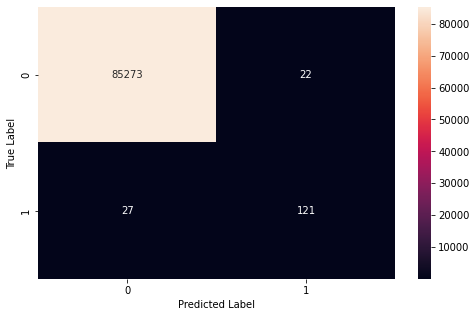

In [48]:
# confusion mat
confusion_mat = confusion_matrix(y_test, y_pred.round()) 
print(confusion_mat)

df_conf = pd.DataFrame(confusion_mat, index=(0, 1), columns = (0, 1))
plt.figure(figsize = (8, 5))
s = sns.heatmap(df_conf, annot=True, fmt='g')
s.set(xlabel='Predicted Label', ylabel='True Label')

In [49]:
# AUPRC
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
auprc_ann_unbalanced = metrics.auc(recall, precision)
print(auprc_ann_unbalanced)

#AUROC
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
auroc_ann_unbalanced = metrics.auc(false_positive_rate, true_positive_rate)
print(auroc_ann_unbalanced)

0.804417405610736
0.9915250014655022


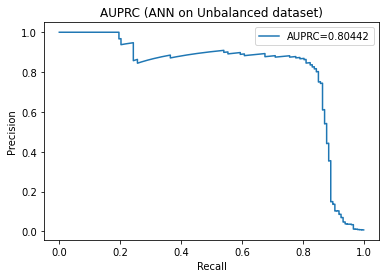

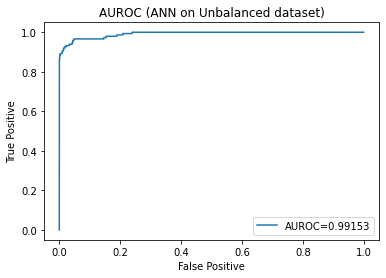

In [50]:
plt.plot(recall, precision, label="AUPRC={0:.5f}".format(auprc_ann_unbalanced))
plt.title('AUPRC (ANN on Unbalanced dataset)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.plot(false_positive_rate, true_positive_rate, label="AUROC={0:.5f}".format(auroc_ann_unbalanced))
plt.title('AUROC (ANN on Unbalanced dataset)')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()
plt.show()

**CNN**

In [51]:
cnn_unbalanced = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

cnn_unbalanced.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 28, 32)            128       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 14, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 448)               0         
                                                                 
 dense_12 (Dense)            (None, 32)                14368     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 14,529
Trainable params: 14,529
Non-trainable params: 0
__________________________________________________

In [52]:
cnn_unbalanced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_unbalanced.fit(X_train, y_train, epochs=5, batch_size=100)

Epoch 1/5
1994/1994 [==============================] - 11s 5ms/step - loss: 0.0087 - accuracy: 0.9991
Epoch 2/5
1994/1994 [==============================] - 8s 4ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 3/5
1994/1994 [==============================] - 7s 4ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 4/5
1994/1994 [==============================] - 7s 4ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 5/5
1994/1994 [==============================] - 8s 4ms/step - loss: 0.0032 - accuracy: 0.9993


In [53]:
# evaluation
score = cnn_unbalanced.evaluate(X_test, y_test)
score

2671/2671 [==============================] - 4s 1ms/step - loss: 0.0036 - accuracy: 0.9993


[0.0035513120237737894, 0.9992860555648804]

In [54]:
# prediction
y_pred = cnn_unbalanced.predict(X_test)

[[85275    20]
 [   41   107]]


[Text(51.0, 0.5, 'True Label'), Text(0.5, 24.0, 'Predicted Label')]

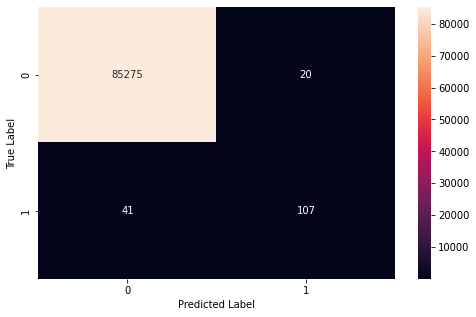

In [55]:
# confusion mat
confusion_mat = confusion_matrix(y_test, y_pred.round()) 
print(confusion_mat)

df_conf = pd.DataFrame(confusion_mat, index=(0, 1), columns = (0, 1))
plt.figure(figsize = (8, 5))
s = sns.heatmap(df_conf, annot=True, fmt='g')
s.set(xlabel='Predicted Label', ylabel='True Label')

In [56]:
# AUPRC
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
auprc_cnn_unbalanced = metrics.auc(recall, precision)
print(auprc_cnn_unbalanced)

#AUROC
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
auroc_cnn_unbalanced = metrics.auc(false_positive_rate, true_positive_rate)
print(auroc_cnn_unbalanced)

0.8034367691204531
0.9725439769448798


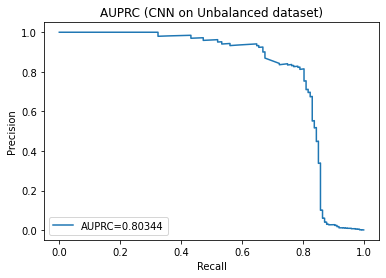

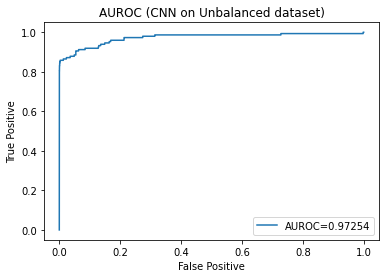

In [57]:
plt.plot(recall, precision, label="AUPRC={0:.5f}".format(auprc_cnn_unbalanced))
plt.title('AUPRC (CNN on Unbalanced dataset)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.plot(false_positive_rate, true_positive_rate, label="AUROC={0:.5f}".format(auroc_cnn_unbalanced))
plt.title('AUROC (CNN on Unbalanced dataset)')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()
plt.show()

# Evaluation Table

In [58]:
evaluation_res = pd.DataFrame([['ANN (Oversampled)', auprc, auroc], 
                               ['CNN (Oversampled)', auprc_cnn, auroc_cnn], 
                               ['ANN (Unbalanced)', auprc_ann_unbalanced, auroc_ann_unbalanced],
                               ['CNN (Unbalanced)', auprc_cnn_unbalanced, auroc_cnn_unbalanced]], columns = ['Model', 'AUPRC', 'AUROC'])
evaluation_res

,Model,AUPRC,AUROC
0,ANN (Oversampled),0.999653,0.999695
1,CNN (Oversampled),0.999749,0.999795
2,ANN (Unbalanced),0.804417,0.991525
3,CNN (Unbalanced),0.803437,0.972544
